In [2]:
import tensorflow as tf
from tensorflow import keras
#helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 41s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 7s 2us/step


In [7]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [9]:
train_images.dtype # uint8, 0-255

dtype('uint8')

In [10]:
validation_images = train_images[:5000]/255.0
validation_labels = train_labels[:5000]
train_images = train_images[5000:]/255.0
train_labels = train_labels[5000:]

In [11]:
print(train_images.shape)
print(len(train_labels))    
print(validation_images.shape)
print(len(validation_labels))

(55000, 28, 28)
55000
(5000, 28, 28)
5000


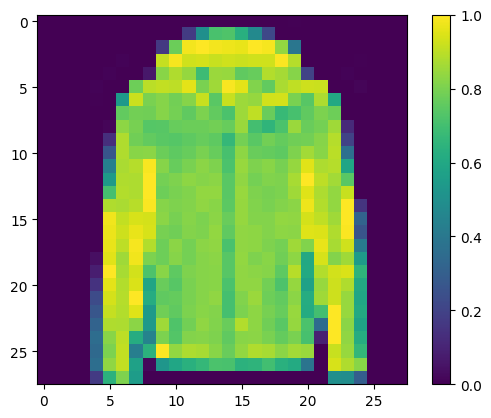

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_labels

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

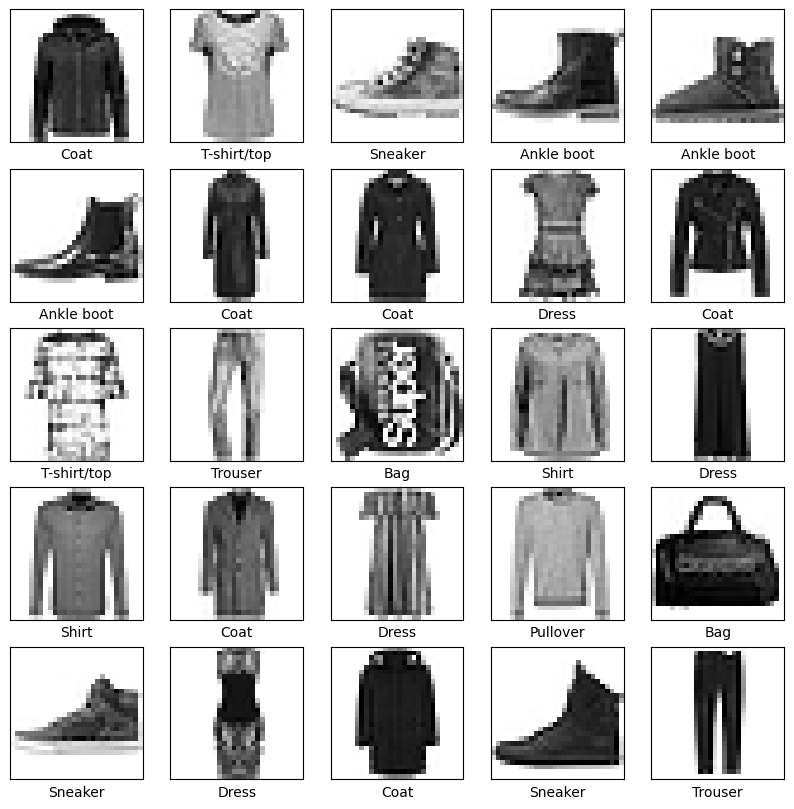

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [18]:
model = keras.Sequential() 
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

d:\programs\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#flatten layer: 28*28=784
#first dense layer: (784+1)*300=235500
#second dense layer: (300+1)*100=30100
#output layer: (100+1)*10=1010
#total params=235500+30100+1010=266610

In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [22]:
model.compile (loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# loss function - how to measure the error
# optimizer - how to update the weights based on the loss function
# metrics - how to monitor the training and testing steps

#### why sparse_categorical_crossentropy?
#### because the labels are integers, not one-hot encoded ex [0,1,2,3,4,5,6,7,8,9].

#### why not categorical_crossentropy?
#### because that would require one-hot encoding of the labels ex [0,0,1,0,0,0,0,0,0,0] for class 2.

#### why not binary_crossentropy?
#### because that is for binary classification problems, not multi-class classification problems ex 10 classes here.

#### why not mse?
#### because that is for regression problems, not classification problems.

#### why softmax activation in the output layer?
#### because it is a multi-class classification problem, not binary classification problem and softmax gives probabilities for each class and the class with the highest probability is the predicted class.

#### why relu activation in the hidden layers?
#### because it is a non-linear activation function that helps the model to learn complex patterns in the data.

#### why accuracy as a metric?
#### because it is a classification problem and accuracy is a good metric for classification problems.

In [23]:
#why sparse_categorical_crossentropy?
#because the labels are integers, not one-hot encoded ex [0,1,2,3,4,5,6,7,8,9].

#why not categorical_crossentropy?
#because that would require one-hot encoding of the labels ex [0,0,1,0,0,0,0,0,0,0] for class 2.

# why not binary_crossentropy?
#because that is for binary classification problems, not multi-class classification problems ex 10 classes here.

# why not mse?
#because that is for regression problems, not classification problems.

#why softmax activation in the output layer?
#because it is a multi-class classification problem, not binary classification problem and softmax gives probabilities for each class and the class with the highest probability is the predicted class.

# why relu activation in the hidden layers?
#because it is a non-linear activation function that helps the model to learn complex patterns in the data.

# why accuracy as a metric?
#because it is a classification problem and accuracy is a good metric for classification problems.

In [25]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(validation_images, validation_labels))

# test the model
test_loss, test_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.3635 - val_accuracy: 0.8582 - val_loss: 0.3733
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.3635 - val_accuracy: 0.8582 - val_loss: 0.3733
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3267 - val_accuracy: 0.8714 - val_loss: 0.3591
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3267 - val_accuracy: 0.8714 - val_loss: 0.3591
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3046 - val_accuracy: 0.8812 - val_loss: 0.3274
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3046 - val_accuracy: 0.8812 - val_loss: 0.3274
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8926 - loss: 0.2882 - val_accuracy: 0.8922 - val_loss: 0.3028
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8926 - loss: 0.2882 - 

In [28]:
print(history.history.keys())
print(history.epoch)
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [29]:
model.save('fashion_mnist_model.h5')

In [30]:
import pandas as pd 

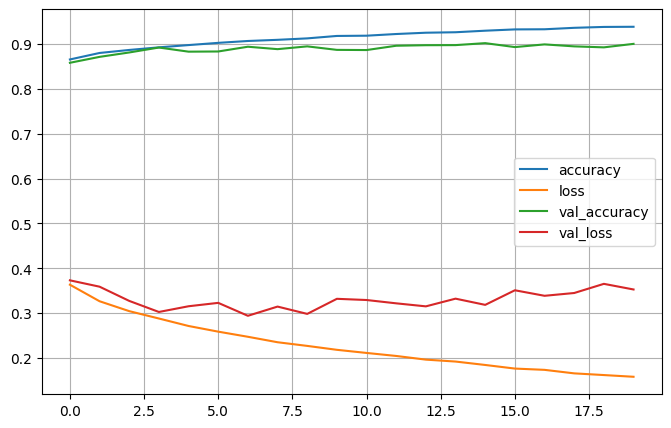

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [34]:
model.evaluate(test_images/255.0, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.8897 - loss: 0.3726


[0.3725649118423462, 0.8896999955177307]

In [44]:
X_new = test_images[0:7]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
X_pred = model.predict(X_new)
y_pred = X_pred.argmax(axis =1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [46]:
y_pred

array([9, 2, 1, 1, 6, 1, 4])

In [47]:
test_labels[0]

np.uint8(9)

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat'], dtype='<U11')

In [52]:
model = keras.models.load_model('fashion_mnist_model.h5')

X_pred = model.predict(validation_images)
y_pred = X_pred.argmax(axis=1)

print(y_pred[:7])
print(validation_labels[:7])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[9 0 0 3 3 2 7]
[9 0 0 3 0 2 7]
